# Stock Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = 'AMD'
start = '2012-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbols,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.53,5.59,5.44,5.48,5.48,12675100
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400


In [3]:
dataset['Returns'] = np.log(dataset['Adj Close'] / dataset['Adj Close'].shift(1))

In [4]:
dataset = dataset.dropna()

In [5]:
X = dataset['Open']
Y = dataset['Adj Close']

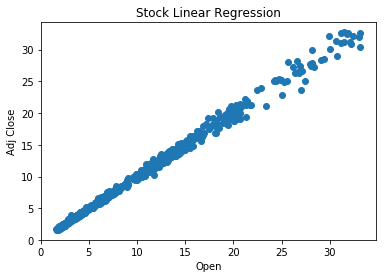

In [6]:
plt.scatter(X,Y)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [10]:
X_train.shape

(1407, 1)

In [11]:
from sklearn.linear_model import LinearRegression

linregression=LinearRegression()
linregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = linregression.predict(X_test)
y_pred

array([[13.61630408],
       [ 4.16396687],
       [ 3.6559909 ],
       [ 4.08428437],
       [11.24574954],
       [14.27368475],
       [10.39912292],
       [ 2.17190424],
       [29.81177331],
       [18.09844501],
       [ 4.05440343],
       [ 2.5205152 ],
       [16.54463616],
       [ 4.23368906],
       [ 2.51055488],
       [ 3.34722119],
       [ 2.6001977 ],
       [ 2.29142799],
       [ 3.98468124],
       [ 5.74765667],
       [ 5.01059349],
       [ 4.14404625],
       [ 5.82733917],
       [ 6.99269582],
       [ 2.08226142],
       [11.42503518],
       [ 9.92102789],
       [ 3.54642746],
       [ 3.90499873],
       [ 7.29150521],
       [11.1361861 ],
       [11.97285241],
       [ 4.12412562],
       [ 2.3711105 ],
       [ 3.85519716],
       [ 9.96086914],
       [ 6.7536483 ],
       [ 2.40099144],
       [ 3.70579247],
       [ 3.08825305],
       [ 4.31337157],
       [ 1.97269797],
       [ 5.45880759],
       [ 2.7496024 ],
       [14.25376413],
       [ 1

In [13]:
print('Intercept')
linregression.intercept_

Intercept


array([0.02047659])

In [14]:
print('Slope')
linregression.coef_

Slope


array([[0.99603132]])

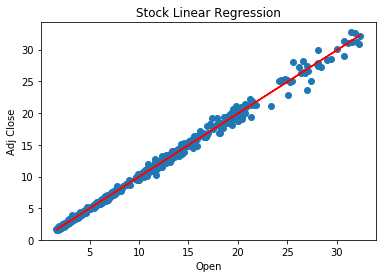

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.plot(X_train,linregression.predict(X_train),'r')
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()